# Task 1: Prediction using Supervised ML
**Name: Devansh Kumar Garg**

**GRIP - The Sparks Foundation**

**Introduction:** In this assignment we will anticipate the level of imprints that an understudy is required to score dependent on the quantity of hours they considered. This is a simple linear regression task as it includes only two factors.

### Step1: Import all libraries

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step2: Read the Dataset

In [2]:
dataset = pd.read_csv(r"http://bit.ly/w-data")
dataset.head(50)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step3: Count number of rows and columns

In [3]:
dataset.shape

(25, 2)

### Step4: Lets see the data type 

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Step5: Show the summary 

In [7]:
 dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###  Step6: Now display the dependent and independent variables

In [8]:
x = dataset.iloc[: ,  :-1].values 
y = dataset.iloc[ : , -1]. values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


### Step7: Here we will plot the given data

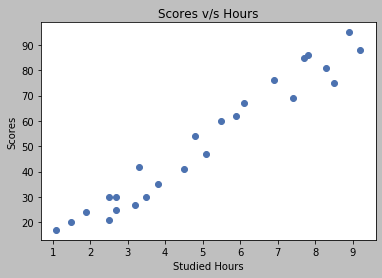

In [48]:
plt.style.use('seaborn-deep')
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.title('Scores v/s Hours')
plt.xlabel('Studied Hours')
plt.ylabel('Scores')
plt.show()

### Step8: Split the data into two sets which are training and testing

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state= 0 )
print(x_train)

[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [23]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [24]:
print(y_train)

[76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [25]:
print(y_test)

[20 27 69 30 62 35 24 86]


### Step9: Training the Simple Linear Regression model on the Training set

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Step 10: Plotting for the test data

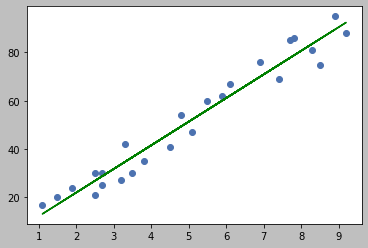

In [31]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line,color = 'green');

plt.show()

### Step 11: Visualize the Training set results

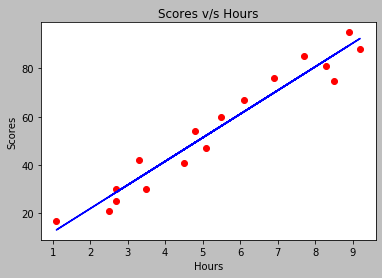

In [32]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Scores v/s Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Step 12: Visualize the Test set results

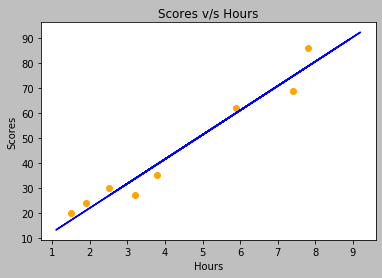

In [34]:
plt.scatter(x_test, y_test, color = 'orange')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Scores v/s Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Step 13: Printing the parameters, the intercept and the slope of the regression line fitted

In [35]:
print(regressor.coef_) 
print(regressor.intercept_)

[9.78856669]
2.370815382341881


### Step 14: Predict the Test set results

In [39]:
y_pred = regressor.predict(x_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


### Step 15: Compare actual v/s predicted score

In [40]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Step 16: Now predict the score for studying 9.25 hours

In [47]:
pred_score = regressor.predict([[9.25]])
print("The score for studying 9.25 hours per day is:{} ".format(pred_score))

The score for studying 9.25 hours per day is:[92.91505723] 


### Step 17: Calculate Error Metrics

In [49]:
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
print('MaximumError:', max_error(y_test, y_pred)

MaximumError: 7.27836446101557


In [53]:
print('The R-Square of model is:' ,r2_score(y_test, y_pred))

The R-Square of model is: 0.9568211104435257


### Conclusion

**We used a linear regression model to predict the score of student if he/she studies for 9.25 hours/day and the Predicted Score came out to be 92.91.**